README for Mental Health Traits Analysis

Overview

This repository contains code for data manipulation and the creation of new CSV files, specifically designed for analyzing mental health traits. The analysis is driven by a model-based inference approach that focuses on the dominant mental health traits.

Key Points

	1.	Data Manipulation and CSV Creation:
	•	The primary function of this code is to manipulate the given data and generate new CSV files that are used for further analysis.
	2.	Model-Driven Inference:
	•	This project employs a model-driven inference methodology, based on the understanding that the dominant “mental health traits” include:
	•	Growing Stress
	•	Mental Health History
	•	Mood Swings
	•	Coping Struggles
	•	Work Interest
	•	Social Weakness
	3.	Correlation with Family History and Mental Health Treatment:
	•	In studying these mental health traits, it has been observed that family history of mental health issues and previous mental health treatments show a strong correlation with the traits.
	4.	Overlap and Ranking of Mental Health Traits:
	•	All subjects’ mental health traits were examined to identify any overlapping responses.
	•	When one subject’s responses perfectly matched another’s, they were counted together.
	•	The responses were then ranked based on the frequency of overlapping answers.
	•	The top 50 combinations with the highest counts were found to have the strongest correlation between family history of mental health and the traits.

Files
    
    •   df_factors.csv: Read in from clean_up_file.ipynb and Mental-Health-Dataset.csv
	•	data_manipulation.ipynb: Jupyter Notebook for data cleaning, manipulation, and creation of new CSV files.
	•	top_10_percent_answers/top_50_percent_answers: The resulting CSV file after data manipulation and analysis, containing the ranked combinations of mental health traits.

In [19]:
#dependencies
import pandas as pd
import numpy as np  
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.preprocessing import StandardScaler


In [20]:
#data import
data = pd.read_csv('df_factors.csv')

#data exploration
print(data.head())
print(data.describe())
print(data.info())

#column exploration
print(data.columns)


   gender        country occupation self_employed  family_history  treatment  \
0  Female  United States  Corporate            No               1          1   
1  Female  United States  Corporate            No               1          1   
2  Female         Poland  Corporate            No              -1          1   
3  Female      Australia  Corporate            No               1          1   
4  Female  United States  Corporate            No              -1         -1   

  days_indoors  growing_stress  changes_habits  mental_health_history  \
0    1-14 days               1              -1                      1   
1    1-14 days               1              -1                      1   
2    1-14 days               1              -1                      1   
3    1-14 days               1              -1                      1   
4    1-14 days               1              -1                      1   

   mood_swings  coping_struggles  work_interest  social_weakness  \
0           

In [21]:
# #inspect summary statistics
# print(data.describe())
# summary_stats = data.describe(include='all')
#unique_counts = data.nunique()
# print(summary_stats)
#print(unique_counts)

variance = data.var(numeric_only=True)
print(variance)




family_history            0.956093
treatment                 0.999938
growing_stress            0.657392
changes_habits            0.668907
mental_health_history     0.672401
mood_swings               0.653480
coping_struggles          0.996877
work_interest             0.648964
social_weakness           0.645951
mental_health_severity    2.850302
candidacy_rating          4.692842
dtype: float64


Summary Statistics:
        gender        country occupation self_employed  family_history  \
count   287162         287162     287162        287162   287162.000000   
unique       2             35          5             2             NaN   
top       Male  United States  Housewife            No             NaN   
freq    235950         168056      65173        257994             NaN   
mean       NaN            NaN        NaN           NaN       -0.209547   
std        NaN            NaN        NaN           NaN        0.977800   
min        NaN            NaN        NaN           NaN       -1.000000   
25%        NaN            NaN        NaN           NaN       -1.000000   
50%        NaN            NaN        NaN           NaN       -1.000000   
75%        NaN            NaN        NaN           NaN        1.000000   
max        NaN            NaN        NaN           NaN        1.000000   

            treatment days_indoors  growing_stress  changes_habits  \
count   287162.000000

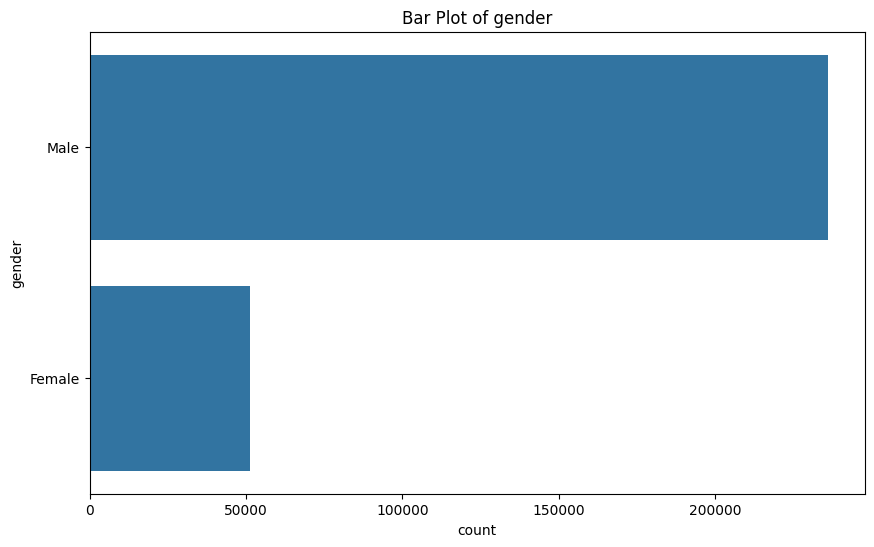


Column: country
Value Counts:
country
United States             168056
United Kingdom             50624
Canada                     17556
Australia                   6026
Netherlands                 5894
Ireland                     5548
Germany                     4680
Sweden                      2818
India                       2774
France                      2340
Brazil                      2340
New Zealand                 1994
South Africa                1994
Switzerland                 1560
Israel                      1560
Italy                       1560
Belgium                      824
Poland                       824
Russia                       780
Denmark                      780
Singapore                    780
Greece                       780
Czech Republic               390
Georgia                      390
Colombia                     390
Moldova                      390
Mexico                       390
Croatia                      390
Thailand                     390
Nige

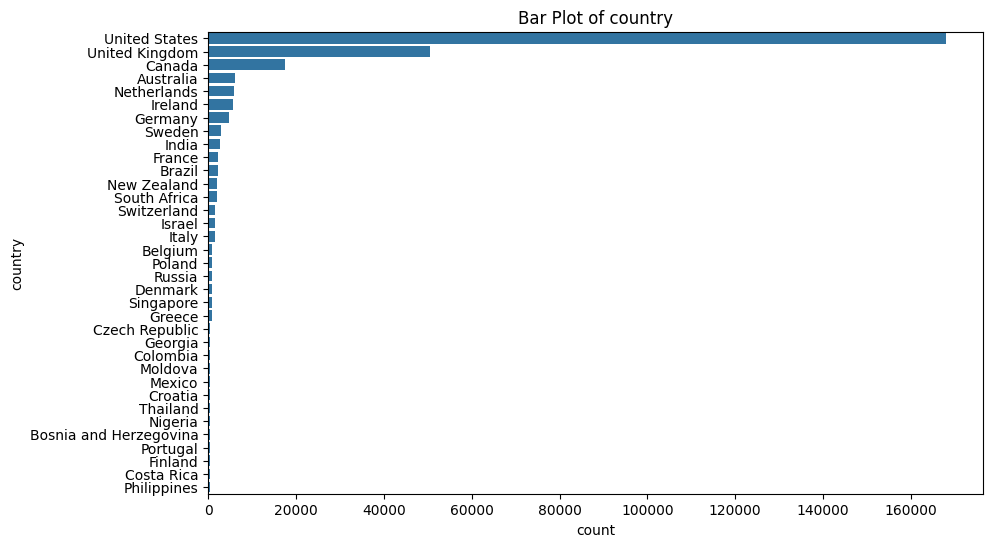


Column: occupation
Value Counts:
occupation
Housewife    65173
Student      60687
Corporate    60157
Others       51893
Business     49252
Name: count, dtype: int64


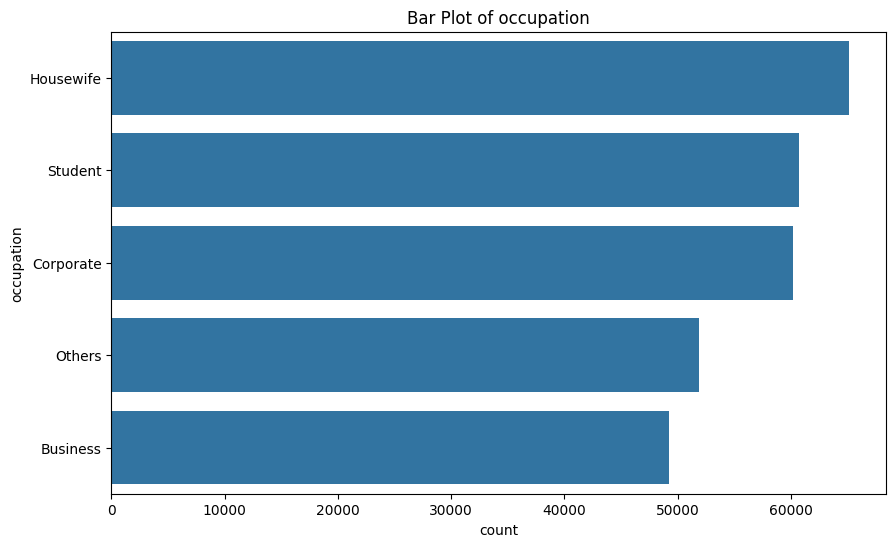


Column: self_employed
Value Counts:
self_employed
No     257994
Yes     29168
Name: count, dtype: int64


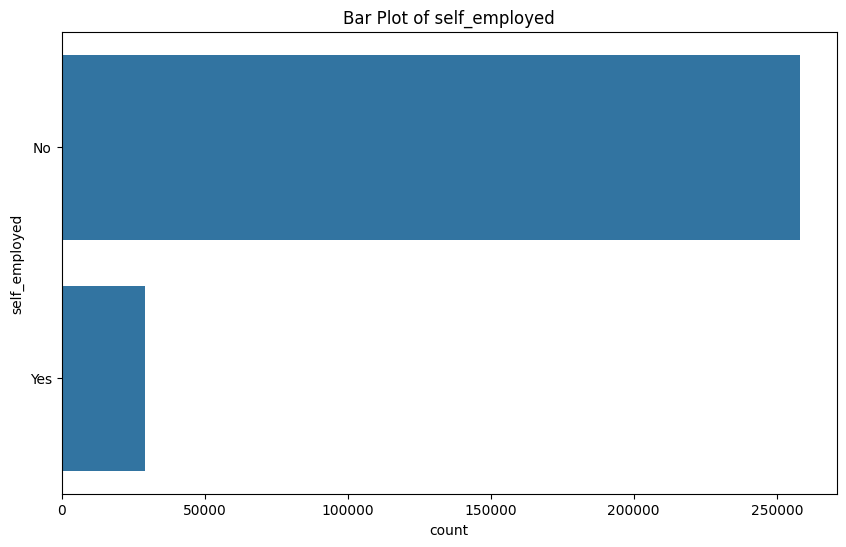


Column: family_history
Summary Statistics:
count    287162.000000
mean         -0.209547
std           0.977800
min          -1.000000
25%          -1.000000
50%          -1.000000
75%           1.000000
max           1.000000
Name: family_history, dtype: float64


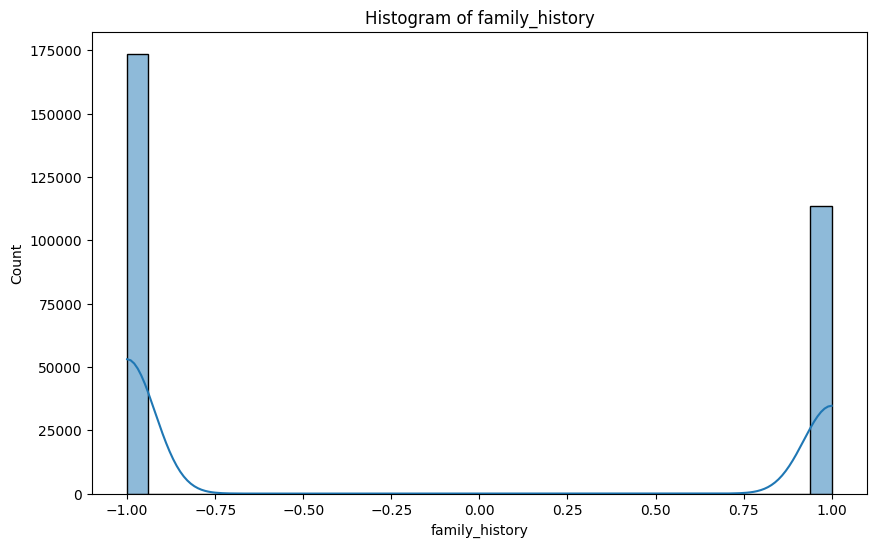

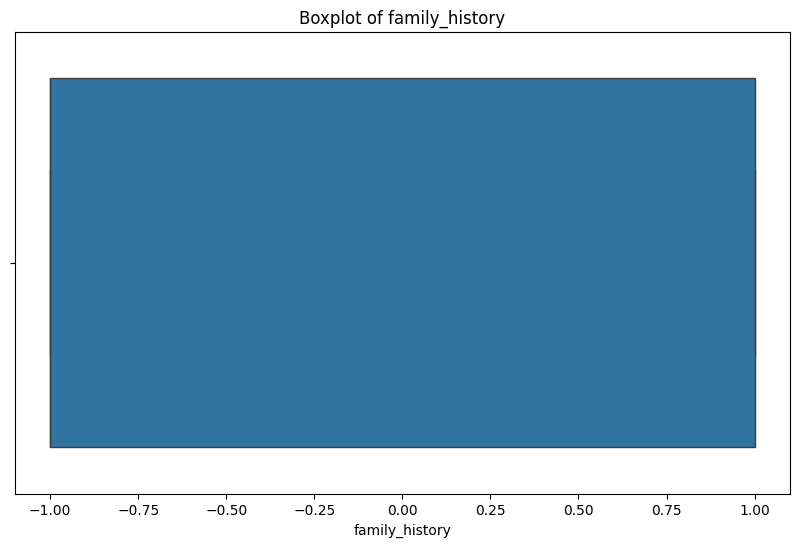


Column: treatment
Summary Statistics:
count    287162.000000
mean          0.008100
std           0.999969
min          -1.000000
25%          -1.000000
50%           1.000000
75%           1.000000
max           1.000000
Name: treatment, dtype: float64


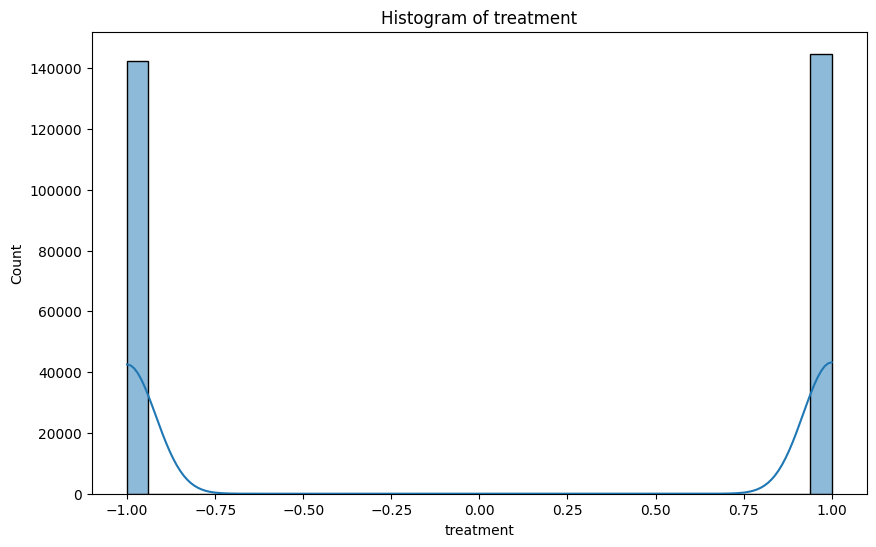

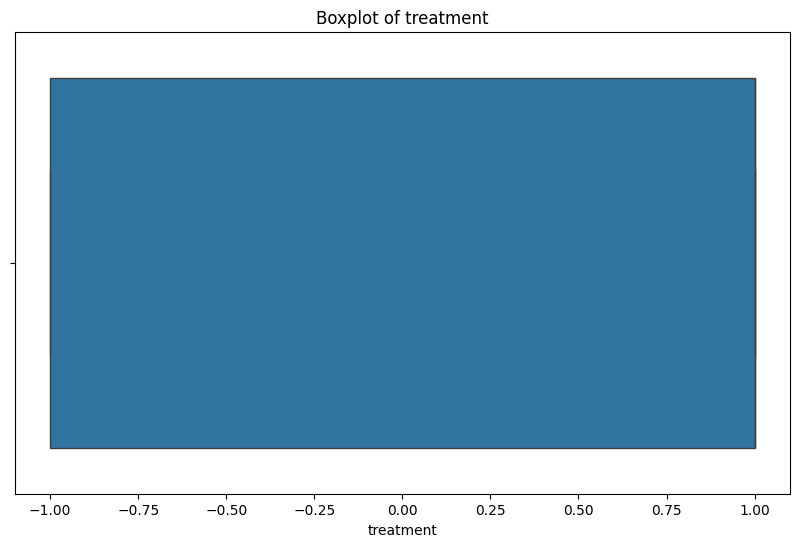


Column: days_indoors
Value Counts:
days_indoors
1-14 days             62429
31-60 days            59625
Go out Every day      57323
More than 2 months    54918
15-30 days            52867
Name: count, dtype: int64


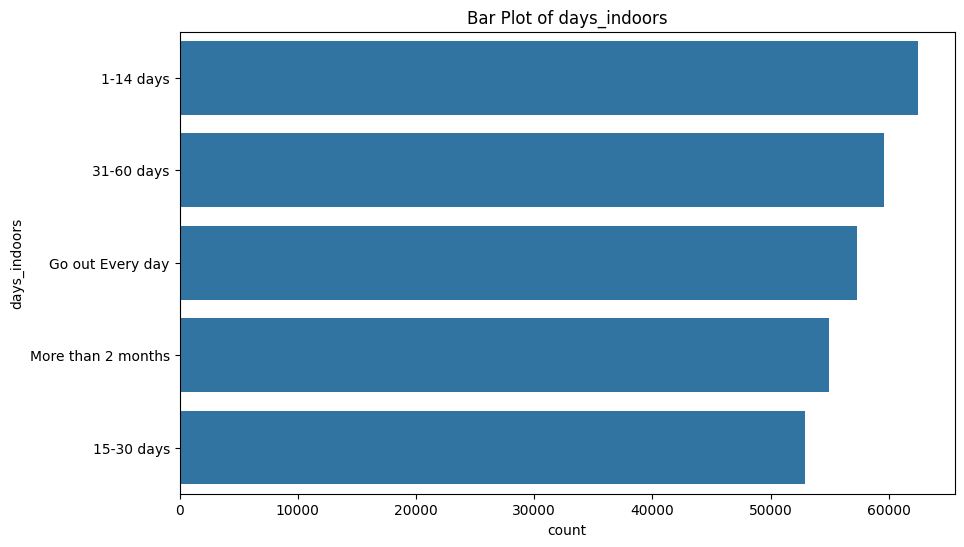


Column: growing_stress
Summary Statistics:
count    287162.000000
mean          0.023579
std           0.810797
min          -1.000000
25%          -1.000000
50%           0.000000
75%           1.000000
max           1.000000
Name: growing_stress, dtype: float64


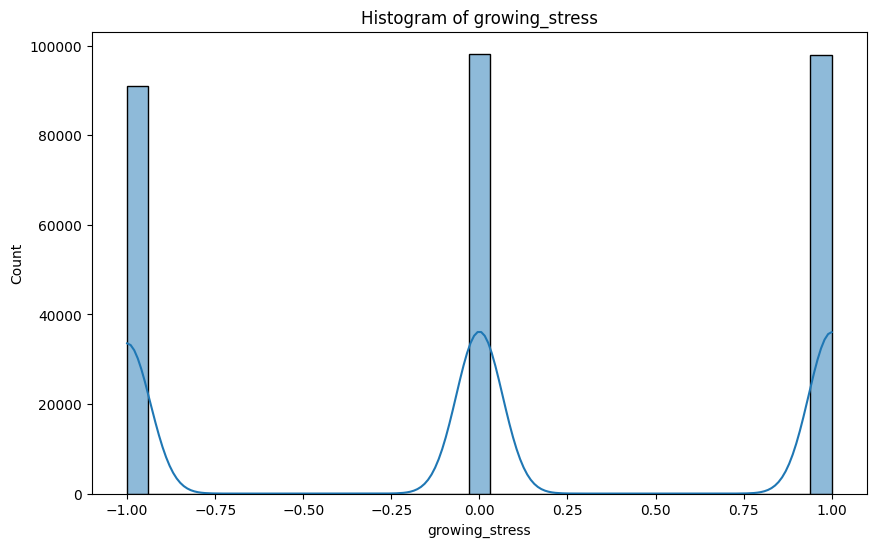

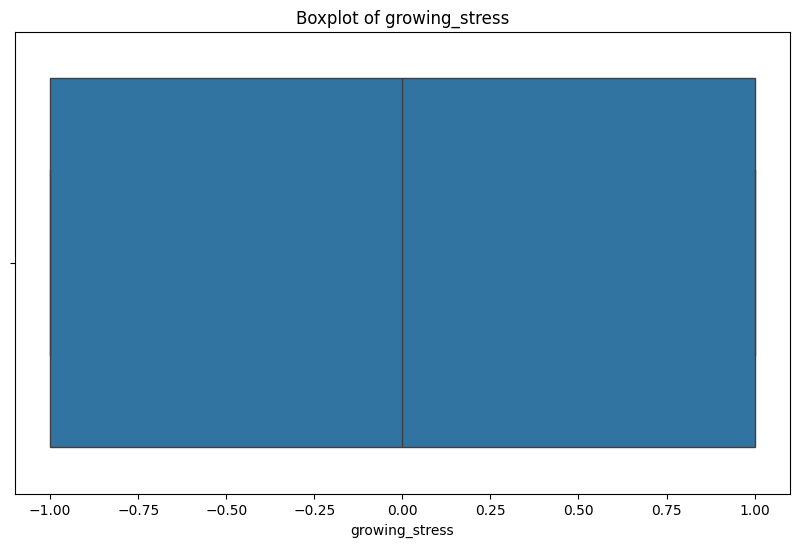


Column: changes_habits
Summary Statistics:
count    287162.000000
mean          0.074763
std           0.817867
min          -1.000000
25%          -1.000000
50%           0.000000
75%           1.000000
max           1.000000
Name: changes_habits, dtype: float64


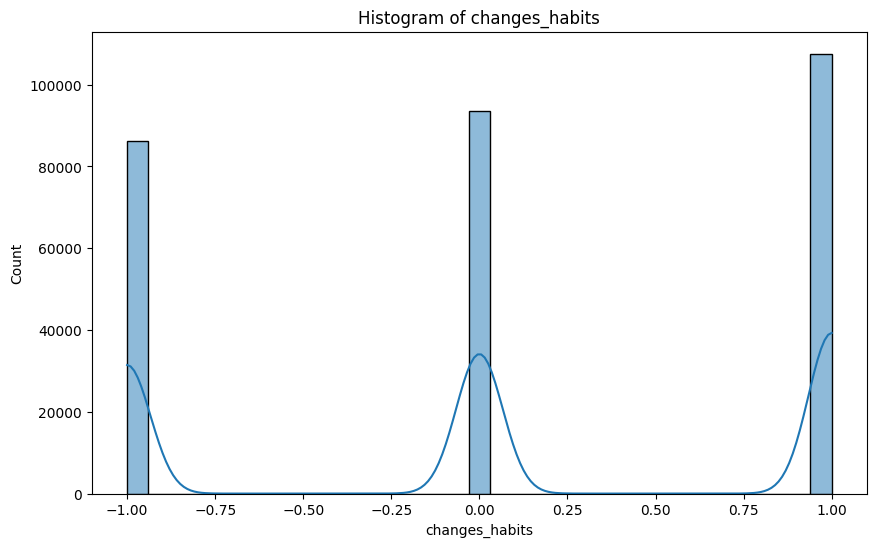

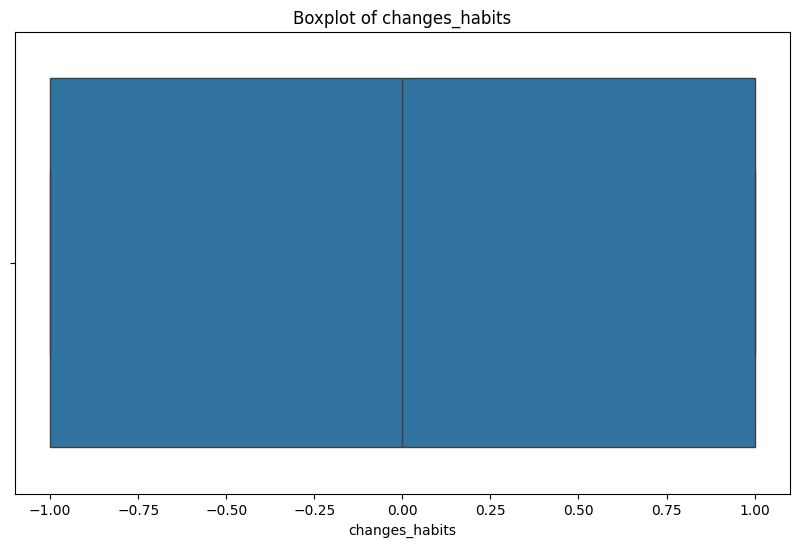


Column: mental_health_history
Summary Statistics:
count    287162.000000
mean         -0.037818
std           0.820001
min          -1.000000
25%          -1.000000
50%           0.000000
75%           1.000000
max           1.000000
Name: mental_health_history, dtype: float64


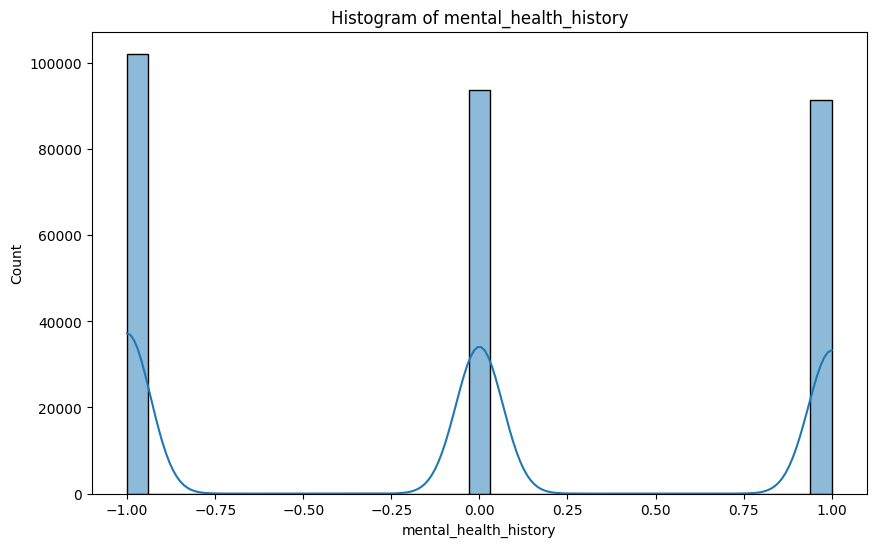

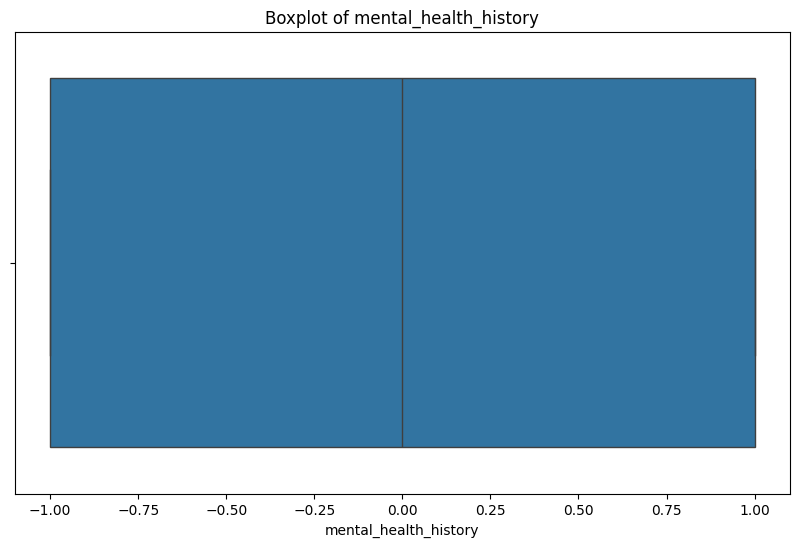


Column: mood_swings
Summary Statistics:
count    287162.000000
mean         -0.028674
std           0.808381
min          -1.000000
25%          -1.000000
50%           0.000000
75%           1.000000
max           1.000000
Name: mood_swings, dtype: float64


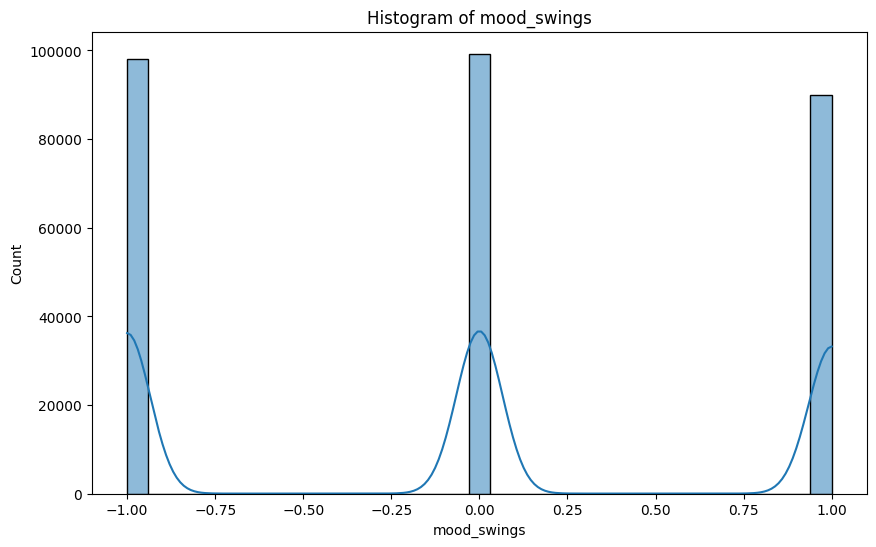

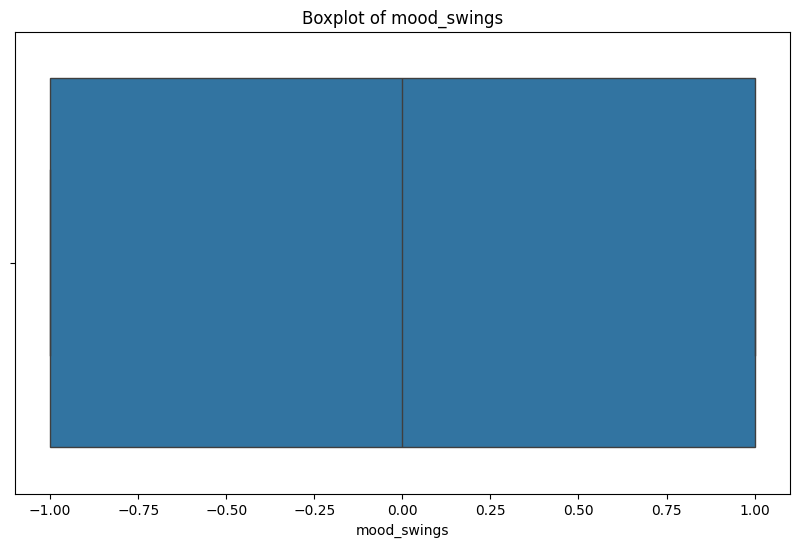


Column: coping_struggles
Summary Statistics:
count    287162.000000
mean         -0.055913
std           0.998437
min          -1.000000
25%          -1.000000
50%          -1.000000
75%           1.000000
max           1.000000
Name: coping_struggles, dtype: float64


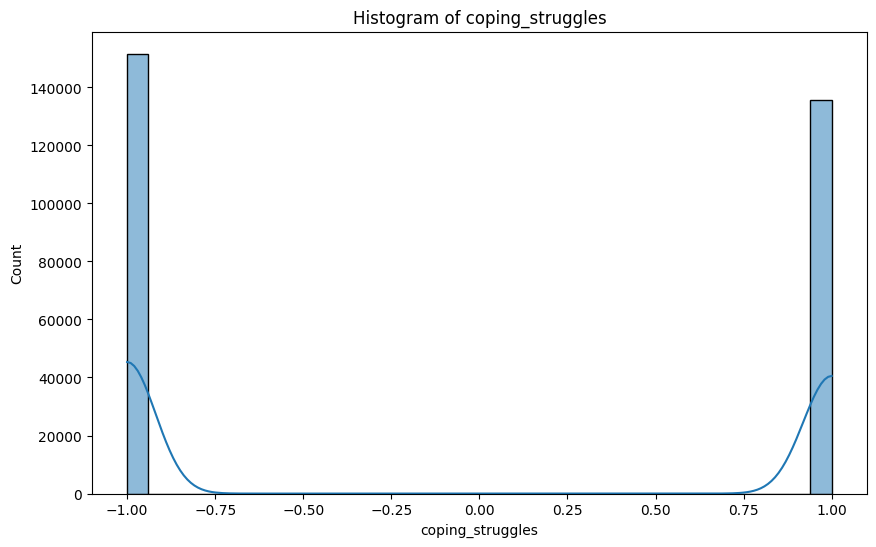

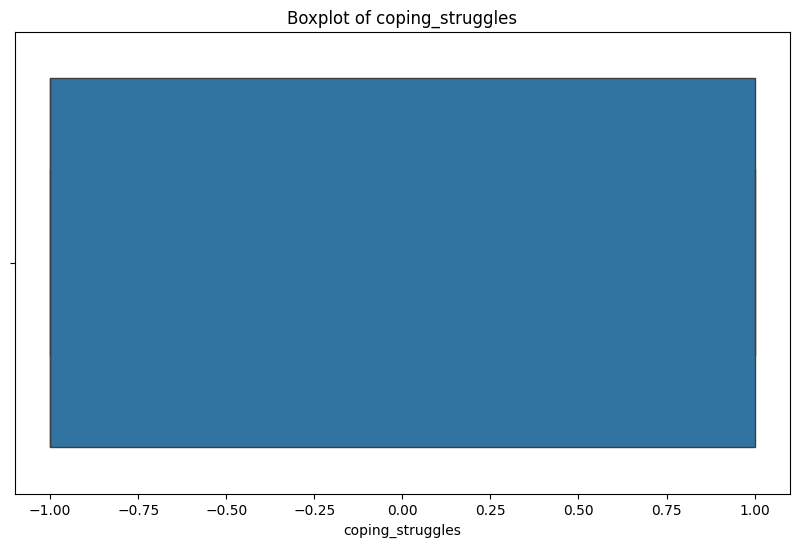


Column: work_interest
Summary Statistics:
count    287162.000000
mean          0.070190
std           0.805583
min          -1.000000
25%          -1.000000
50%           0.000000
75%           1.000000
max           1.000000
Name: work_interest, dtype: float64


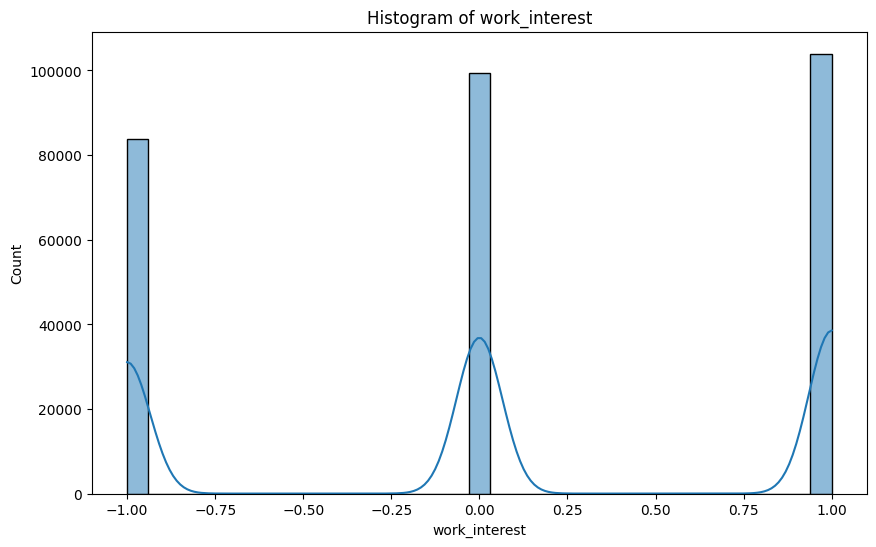

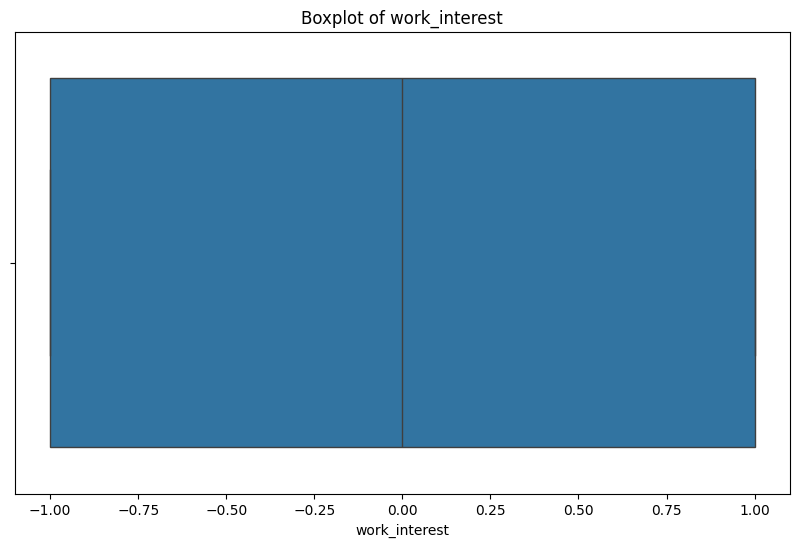


Column: social_weakness
Summary Statistics:
count    287162.000000
mean         -0.019679
std           0.803710
min          -1.000000
25%          -1.000000
50%           0.000000
75%           1.000000
max           1.000000
Name: social_weakness, dtype: float64


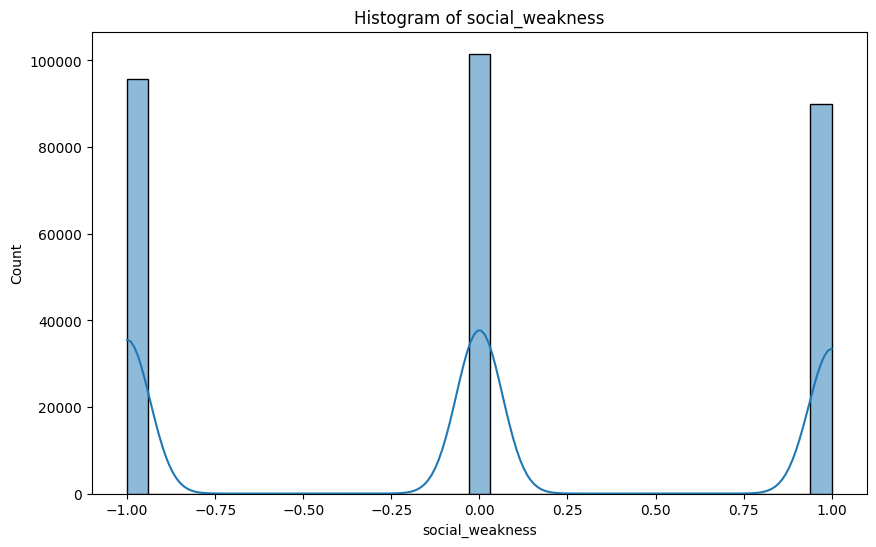

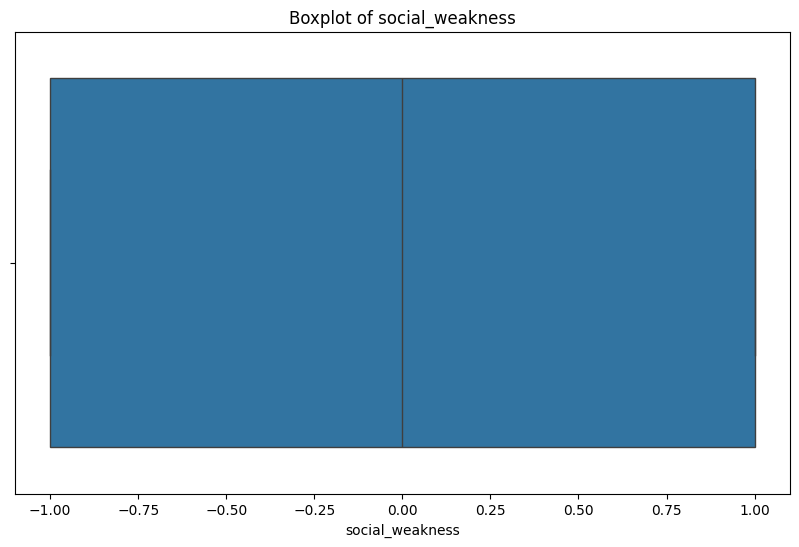


Column: mental_health_interview
Value Counts:
mental_health_interview
No       229304
Maybe     50014
Yes        7844
Name: count, dtype: int64


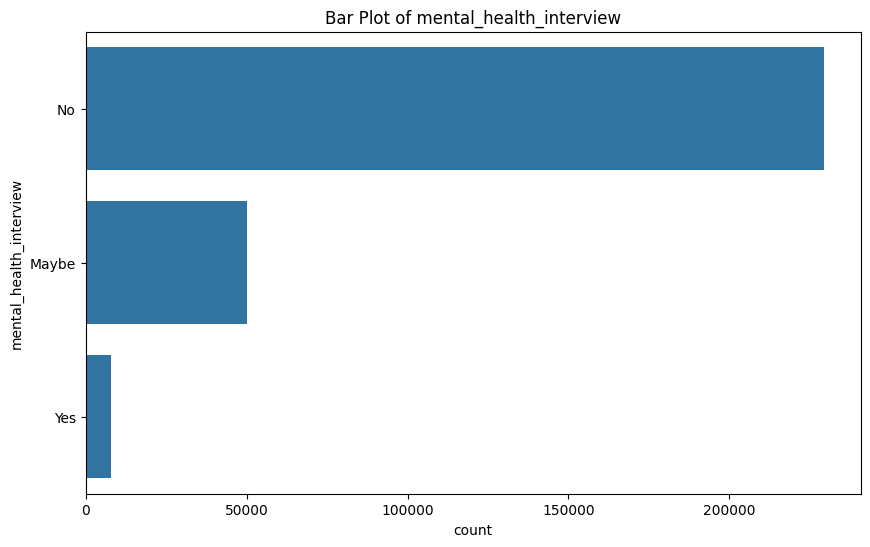


Column: care_options
Value Counts:
care_options
No          116502
Yes          94498
Not sure     76162
Name: count, dtype: int64


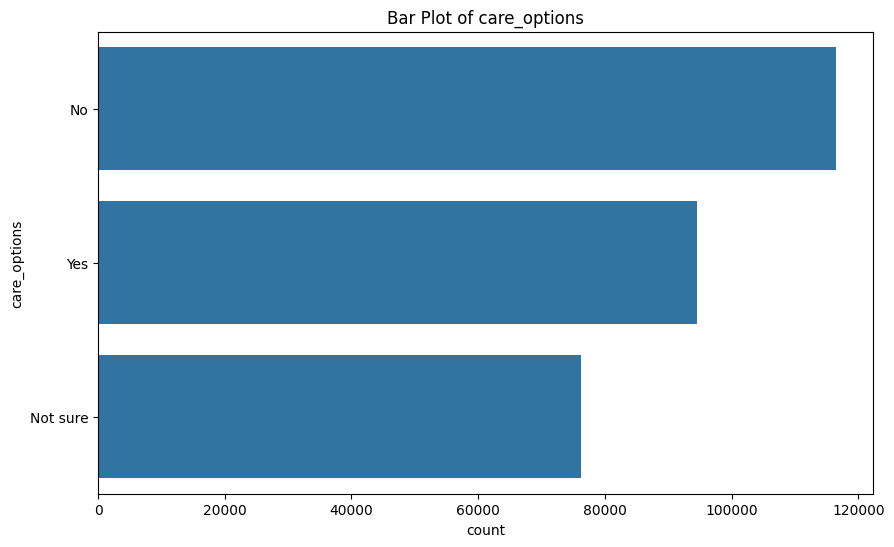


Column: mental_health_severity
Summary Statistics:
count    287162.000000
mean         -0.034075
std           1.688284
min          -4.000000
25%          -1.000000
50%           0.000000
75%           1.000000
max           4.000000
Name: mental_health_severity, dtype: float64


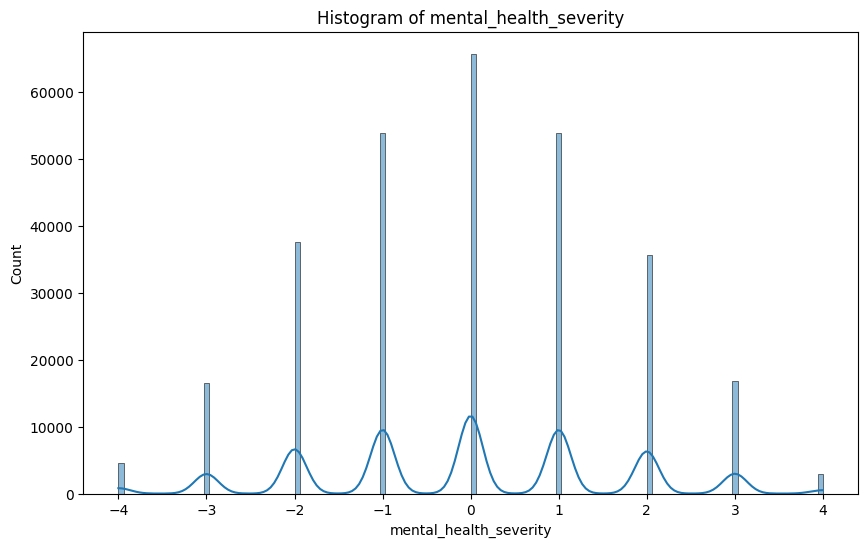

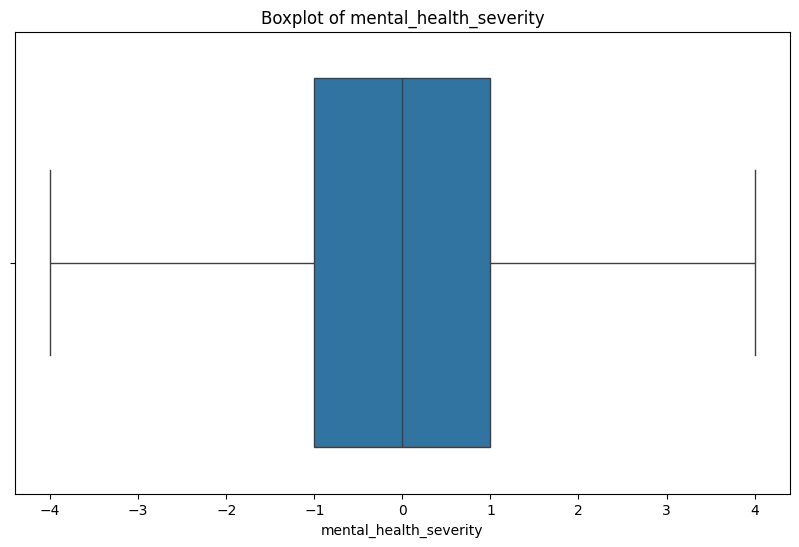


Column: candidacy_rating
Summary Statistics:
count    287162.000000
mean         -0.140924
std           2.166297
min          -5.000000
25%          -2.000000
50%           0.000000
75%           1.000000
max           5.000000
Name: candidacy_rating, dtype: float64


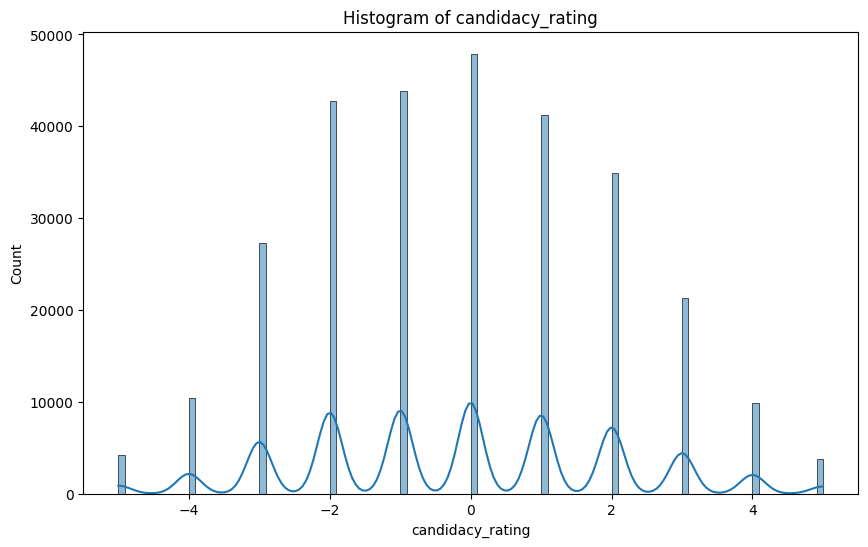

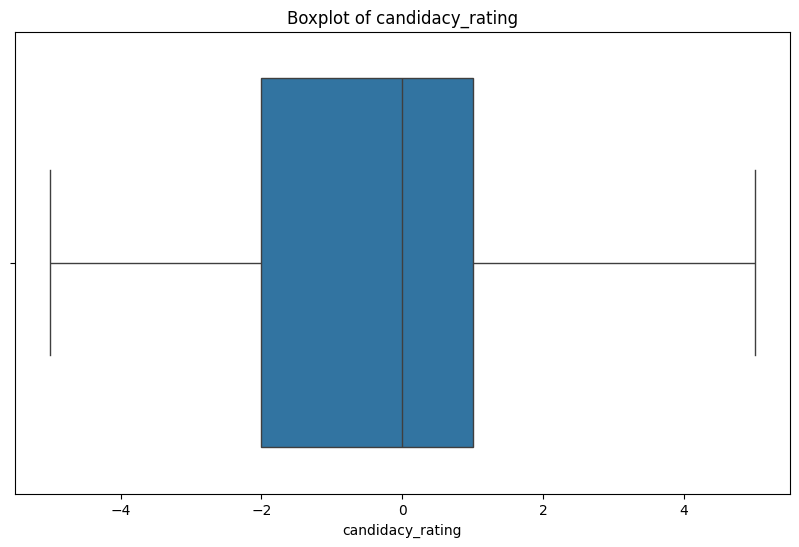


Missing Values and Their Percentages:
gender                     0.0
country                    0.0
occupation                 0.0
self_employed              0.0
family_history             0.0
treatment                  0.0
days_indoors               0.0
growing_stress             0.0
changes_habits             0.0
mental_health_history      0.0
mood_swings                0.0
coping_struggles           0.0
work_interest              0.0
social_weakness            0.0
mental_health_interview    0.0
care_options               0.0
mental_health_severity     0.0
candidacy_rating           0.0
dtype: float64


In [22]:
# Initial analysis
summary_stats = data.describe(include='all')
print("Summary Statistics:")
print(summary_stats)

# Distribution analysis
for column in data.columns:
    print(f"\nColumn: {column}")
    
    if data[column].dtype == 'object':
        # For categorical columns
        value_counts = data[column].value_counts()
        print("Value Counts:")
        print(value_counts)
        
        # Plotting bar plot for categorical columns
        plt.figure(figsize=(10, 6))
        sns.countplot(y=column, data=data, order=value_counts.index)
        plt.title(f'Bar Plot of {column}')
        plt.show()
    else:
        # For numerical columns
        print("Summary Statistics:")
        print(data[column].describe())
        
        # Plotting histogram for numerical columns
        plt.figure(figsize=(10, 6))
        sns.histplot(data[column], kde=True)
        plt.title(f'Histogram of {column}')
        plt.show()
        
        # Plotting boxplot for numerical columns
        plt.figure(figsize=(10, 6))
        sns.boxplot(x=data[column])
        plt.title(f'Boxplot of {column}')
        plt.show()

# Checking for missing values
missing_values = data.isnull().sum()
missing_percentage = (missing_values / len(data)) * 100
print("\nMissing Values and Their Percentages:")
print(missing_percentage)

In [23]:
#refine data by distribution analysis
# drop columns that do not have a normal distribution
# drop columns

refined_df = data.drop(columns=['gender', 'country', 'self_employed', 'mental_health_interview'])

# Display the first few rows of the refined DataFrame to confirm the changes
refined_df.head()


,occupation,family_history,treatment,days_indoors,growing_stress,changes_habits,mental_health_history,mood_swings,coping_struggles,work_interest,social_weakness,care_options,mental_health_severity,candidacy_rating
0,Corporate,1,1,1-14 days,1,-1,1,0,-1,1,1,Yes,1,3
1,Corporate,1,1,1-14 days,1,-1,1,0,-1,1,1,Yes,1,3
2,Corporate,-1,1,1-14 days,1,-1,1,0,-1,1,1,Not sure,1,1
3,Corporate,1,1,1-14 days,1,-1,1,0,-1,1,1,Not sure,1,3
4,Corporate,-1,-1,1-14 days,1,-1,1,0,-1,1,1,No,1,-1


In [24]:
#see data proportions for remaining columns: occupation	family_history	treatment	days_indoors	
# growing_stress	changes_habits	mental_health_history	mood_swings	coping_struggles	
# work_interest	social_weakness	care_options	mental_health_severity	candidacy_rating
print(refined_df['occupation'].value_counts(normalize=True))
print(refined_df['family_history'].value_counts(normalize=True))
print(refined_df['treatment'].value_counts(normalize=True))
print(refined_df['days_indoors'].value_counts(normalize=True))
print(refined_df['growing_stress'].value_counts(normalize=True))
print(refined_df['changes_habits'].value_counts(normalize=True))
print(refined_df['mental_health_history'].value_counts(normalize=True))
print(refined_df['mood_swings'].value_counts(normalize=True))
print(refined_df['coping_struggles'].value_counts(normalize=True))
print(refined_df['work_interest'].value_counts(normalize=True))
print(refined_df['social_weakness'].value_counts(normalize=True))
print(refined_df['care_options'].value_counts(normalize=True))
print(refined_df['mental_health_severity'].value_counts(normalize=True))
print(refined_df['candidacy_rating'].value_counts(normalize=True))

#because i do not know what the strongest indicator of mental health is i will continue to refind by 
#dropping columns that are not evenly distributed (care options and changes in habits)


occupation
Housewife    0.226956
Student      0.211334
Corporate    0.209488
Others       0.180710
Business     0.171513
Name: proportion, dtype: float64
family_history
-1    0.604774
 1    0.395226
Name: proportion, dtype: float64
treatment
 1    0.50405
-1    0.49595
Name: proportion, dtype: float64
days_indoors
1-14 days             0.217400
31-60 days            0.207635
Go out Every day      0.199619
More than 2 months    0.191244
15-30 days            0.184102
Name: proportion, dtype: float64
growing_stress
 0    0.342054
 1    0.340762
-1    0.317183
Name: proportion, dtype: float64
changes_habits
 1    0.374628
 0    0.325506
-1    0.299866
Name: proportion, dtype: float64
mental_health_history
-1    0.355824
 0    0.326171
 1    0.318005
Name: proportion, dtype: float64
mood_swings
 0    0.345700
-1    0.341487
 1    0.312813
Name: proportion, dtype: float64
coping_struggles
-1    0.527956
 1    0.472044
Name: proportion, dtype: float64
work_interest
 1    0.362040
 0    0.346

In [25]:

#because i do not know what the strongest indicator of mental health is i will continue to refind by 
#dropping columns that are not evenly distributed (care options and changes in habits)
#remove added features

refined_df_2 = refined_df.drop(columns=['care_options', 'changes_habits', 'mental_health_severity', 'candidacy_rating'])

In [26]:
#count the number of matched columns to find commonality

count = refined_df_2.groupby(list(refined_df_2.columns)).size().reset_index(name='count')

total_rows = len(refined_df_2)

count['percentage'] = (count['count'] / total_rows) * 100

common_count = count.sort_values(by='percentage', ascending=False)

common_count.tail(10)

,occupation,family_history,treatment,days_indoors,growing_stress,mental_health_history,mood_swings,coping_struggles,work_interest,social_weakness,count,percentage
1672,Housewife,1,-1,Go out Every day,0,-1,-1,1,0,-1,13,0.004527
1673,Housewife,1,-1,Go out Every day,0,-1,-1,1,0,0,13,0.004527
1674,Housewife,1,-1,Go out Every day,0,-1,0,-1,1,-1,13,0.004527
1679,Housewife,1,-1,Go out Every day,0,0,1,1,-1,-1,13,0.004527
1680,Housewife,1,-1,Go out Every day,0,0,1,1,-1,1,13,0.004527
1682,Housewife,1,-1,Go out Every day,0,1,-1,1,-1,0,13,0.004527
1683,Housewife,1,-1,Go out Every day,0,1,-1,1,0,0,13,0.004527
1684,Housewife,1,-1,Go out Every day,0,1,-1,1,0,1,13,0.004527
1685,Housewife,1,-1,Go out Every day,0,1,0,1,0,1,13,0.004527
1600,Housewife,1,-1,15-30 days,-1,0,0,-1,1,-1,13,0.004527


In [27]:
#take a look at the top 10 percentage of commonality
# Sort the DataFrame by the 'percentage' column in descending order
common_count = common_count.sort_values(by='percentage', ascending=False)

# Calculate the cumulative sum of the 'percentage' column
common_count['cumulative_percentage'] = common_count['percentage'].cumsum()

# Identify the rows until the cumulative percentage reaches or exceeds 10%
rows_until_10 = common_count[common_count['cumulative_percentage'] <= 10]

# Count the number of rows
num_rows = len(rows_until_10)

# Display the result
print(f"Number of rows until cumulative percentage reaches 10: {num_rows}")
print(rows_until_10)

#save rows until 10% commonality
top_10_percent_answers = rows_until_10.drop(columns=['count', 'cumulative_percentage'])
#save to csv
top_10_percent_answers.to_csv('top_10_percent_answers.csv', index=False)

top_10_percent_answers.head()


Number of rows until cumulative percentage reaches 10: 107
     occupation  family_history  treatment        days_indoors  \
1207  Housewife              -1         -1           1-14 days   
1744  Housewife               1          1           1-14 days   
1974     Others              -1         -1          31-60 days   
713   Corporate              -1         -1  More than 2 months   
1300  Housewife              -1         -1    Go out Every day   
...         ...             ...        ...                 ...   
579   Corporate              -1         -1           1-14 days   
581   Corporate              -1         -1           1-14 days   
582   Corporate              -1         -1           1-14 days   
1200  Housewife              -1         -1           1-14 days   
587   Corporate              -1         -1           1-14 days   

      growing_stress  mental_health_history  mood_swings  coping_struggles  \
1207               0                      0           -1              

,occupation,family_history,treatment,days_indoors,growing_stress,mental_health_history,mood_swings,coping_struggles,work_interest,social_weakness,percentage
1207,Housewife,-1,-1,1-14 days,0,0,-1,-1,-1,-1,0.181779
1744,Housewife,1,1,1-14 days,0,0,-1,-1,-1,-1,0.103774
1974,Others,-1,-1,31-60 days,-1,0,-1,1,1,1,0.099247
713,Corporate,-1,-1,More than 2 months,0,0,0,-1,-1,-1,0.099247
1300,Housewife,-1,-1,Go out Every day,-1,-1,-1,1,1,0,0.099247


top 50

In [28]:
#take a look at the top 50 percentage of commonality
# Sort the DataFrame by the 'percentage' column in descending order
common_count = common_count.sort_values(by='percentage', ascending=False)

# Calculate the cumulative sum of the 'percentage' column
common_count['cumulative_percentage'] = common_count['percentage'].cumsum()

# Identify the rows until the cumulative percentage reaches or exceeds 50%
rows_until_50 = common_count[common_count['cumulative_percentage'] <= 50]

# Count the number of rows
num_rows = len(rows_until_50)

# Display the result
print(f"Number of rows until cumulative percentage reaches 50: {num_rows}")
print(rows_until_50)

#save rows until 10% commonality
top_50_percent_answers = rows_until_50.drop(columns=['count', 'cumulative_percentage'])
#save to csv
top_50_percent_answers.to_csv('top_50_percent_answers.csv', index=False)


Number of rows until cumulative percentage reaches 50: 658
     occupation  family_history  treatment        days_indoors  \
1207  Housewife              -1         -1           1-14 days   
1744  Housewife               1          1           1-14 days   
2536    Student              -1         -1          15-30 days   
663   Corporate              -1         -1          31-60 days   
2651    Student              -1         -1  More than 2 months   
...         ...             ...        ...                 ...   
2361     Others               1          1           1-14 days   
2493     Others               1          1  More than 2 months   
2363     Others               1          1           1-14 days   
3070    Student               1          1          15-30 days   
1730  Housewife               1          1           1-14 days   

      growing_stress  mental_health_history  mood_swings  coping_struggles  \
1207               0                      0           -1              

In [37]:
check_count = common_count.copy()
check_count.head()
check_count.drop(columns=['count', 'cumulative_percentage'])



,occupation,family_history,treatment,days_indoors,growing_stress,mental_health_history,mood_swings,coping_struggles,work_interest,social_weakness,percentage
1207,Housewife,-1,-1,1-14 days,0,0,-1,-1,-1,-1,0.181779
1744,Housewife,1,1,1-14 days,0,0,-1,-1,-1,-1,0.103774
2536,Student,-1,-1,15-30 days,-1,0,-1,-1,0,1,0.099247
663,Corporate,-1,-1,31-60 days,1,0,1,-1,-1,0,0.099247
2651,Student,-1,-1,More than 2 months,0,-1,0,1,1,-1,0.099247
...,...,...,...,...,...,...,...,...,...,...,...
1682,Housewife,1,-1,Go out Every day,0,1,-1,1,-1,0,0.004527
1683,Housewife,1,-1,Go out Every day,0,1,-1,1,0,0,0.004527
1684,Housewife,1,-1,Go out Every day,0,1,-1,1,0,1,0.004527
2324,Others,1,-1,More than 2 months,-1,0,-1,-1,-1,-1,0.004527


In [36]:
top_10_percent_answers.head()


,occupation,family_history,treatment,days_indoors,growing_stress,mental_health_history,mood_swings,coping_struggles,work_interest,social_weakness,percentage
1207,Housewife,-1,-1,1-14 days,0,0,-1,-1,-1,-1,0.181779
1744,Housewife,1,1,1-14 days,0,0,-1,-1,-1,-1,0.103774
1974,Others,-1,-1,31-60 days,-1,0,-1,1,1,1,0.099247
713,Corporate,-1,-1,More than 2 months,0,0,0,-1,-1,-1,0.099247
1300,Housewife,-1,-1,Go out Every day,-1,-1,-1,1,1,0,0.099247


check bottom 50

In [41]:

# Sort the DataFrame by the 'percentage' column in descending order
common_count = common_count.sort_values(by='percentage', ascending=False)

# Calculate the cumulative sum of the 'percentage' column
common_count['cumulative_percentage'] = common_count['percentage'].cumsum()

# Identify the rows where the cumulative percentage is greater than 50%
bottom_50_percent_answers = common_count[common_count['cumulative_percentage'] > 50]

# Remove unnecessary columns if needed
bottom_50_percent_answers = bottom_50_percent_answers.drop(columns=['count', 'cumulative_percentage'])

# Save to CSV
bottom_50_percent_answers.to_csv('bottom_50_percent_answers.csv', index=False)

# Display the result
bottom_50_percent_answers

,occupation,family_history,treatment,days_indoors,growing_stress,mental_health_history,mood_swings,coping_struggles,work_interest,social_weakness,percentage
1133,Corporate,1,1,Go out Every day,-1,0,-1,-1,0,1,0.051887
3134,Student,1,1,Go out Every day,0,-1,-1,-1,1,1,0.051887
1120,Corporate,1,1,31-60 days,1,0,0,-1,-1,-1,0.051887
2380,Others,1,1,1-14 days,1,1,-1,-1,0,0,0.051887
3168,Student,1,1,More than 2 months,-1,0,1,1,0,1,0.051887
...,...,...,...,...,...,...,...,...,...,...,...
319,Business,1,-1,15-30 days,-1,0,-1,1,0,1,0.004527
317,Business,1,-1,15-30 days,-1,-1,0,1,1,-1,0.004527
315,Business,1,-1,1-14 days,1,1,1,1,-1,0,0.004527
2325,Others,1,-1,More than 2 months,-1,0,-1,-1,0,0,0.004527
